In [2]:
from IPython.display import Image

## Regresión de vecinos más cercanos

La regresión basada en vecinos se puede utilizar en los casos en que las etiquetas de datos son ``variables contínuas`` en vez de discretas.

La etiqueta asignada a ``un punto de consulta`` se calcula en función de la media de las etiquetas de sus vecinos más cercanos.

scikit-learn implementa dos regresores vecinos diferentes:

- KNeighborsRegressor: implementa el aprendizaje basado en k vecinos más cercanos de cada punto de consulta, donde k es un valor entero especificado por el usuario.

- RadiusNeighborsRegressor: implementa el aprendizaje basado en los vecinos de un radio fijo ``r`` del punto de consulta, donde ``r`` es un valor de punto flotante especificado por el usuario.

La regresión básica de vecinos mmás cercanos utiliza ponderaciones uniformes: es decir, cada punto de la vecindad local contribuye de manera uniforme a la clasificación de un punto de consulta. En algunas circunstancias, puede ser ventajoso ponderar puntos de manera que los puntos cercanos contribuyan más a la regresión que los puntos lejanos. Esto se puede lograr mediante la palabra clave ``weights``. El valor predeterminado ``weights = uniform``, asigna pesos iguales a todos los puntos. ``weights = 'distance'`` asigna pesos proporcionales a la inversa de la distancia desde el punto de consulta. Alternativamente, se puede proporicionar una función de la distancia definida por el usuario que se utilizará para calcular los pesos.

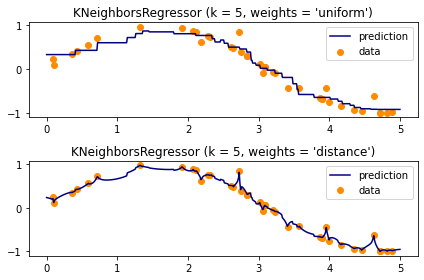

In [14]:

# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

El uso de vecinos mas cercanos de múltiples salidas para regresión en caras. En este ejemplo, las entradas X son los píxeles de la mitad superior de las caras y las salidas Y son los píxeles de la mitad inferior de las caras.

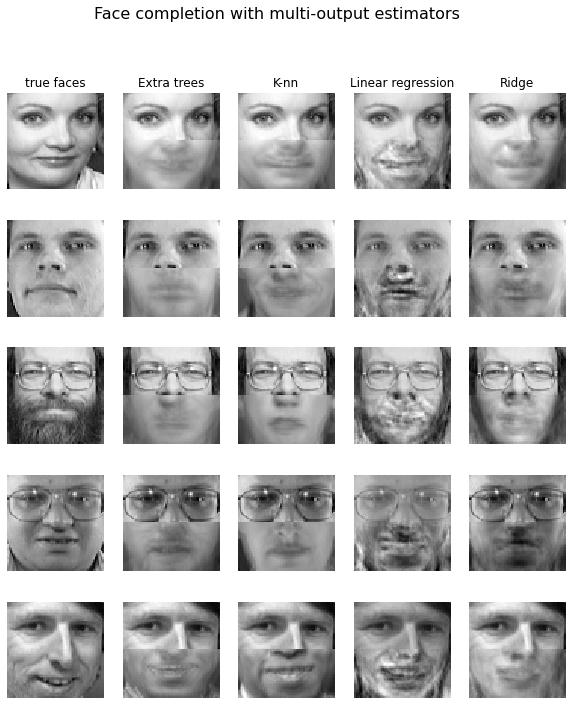

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data, targets = fetch_olivetti_faces(return_X_y=True)

train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()